### Illustration of linear error proagation: zero level offset (ZLO)

#### 1. Set working enviroment

In [1]:
import os
import sys

import matplotlib
import numpy as np
import yaml
from netCDF4 import Dataset

# define  path to search for module
sys.path.append("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/")
os.chdir("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/examples/exp3_rad_offset_gain/")

#### 2. import teds modules

In [2]:
from teds.gm.gm import geometry_module
from teds.sgm import geoscene_generation
from teds.sgm import carbon_radiation_scene_generation
from teds.siml1b import simplified_instrument_model_and_l1b_processor
from teds.l1l2.l1bl2 import level1b_to_level2_processor
from examples.exp3_rad_offset_gain.radiance_offset import add_radiance_offset

#### 3. operational flags

In [3]:
proc_gm = True
proc_sgmgeo = True
proc_sgmrad = True
proc_siml1b = True
proc_l1bl2 = True

#### 4. GM model

In [4]:
if proc_gm:
    # configureation file
    gm_config = yaml.safe_load(open("settings/gm_config.yaml"))
    geometry_module(gm_config)

/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/gm/Tango_Carbon_gm_exp3.0.nc
2024-12-10 21:31:17,973 : teds.lib.lib_utils : gm : 435 : INFO : =>gm calculation finished successfully. 


[21:31:17] =>gm calculation finished successfully. 


#### 5. SGM-GEO

In [5]:
if proc_sgmgeo:
    sgmgeo_config = yaml.safe_load(open("settings/sgmgeo_config.yaml"))

    geoscene_generation(sgmgeo_config)

ch4
[[1800. 1800. 1800. 1800. 1800. 1800. 1800. 1800.]]
co2
[[410. 410. 410. 410. 410. 410. 410. 410.]]
h2o
[[10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.]]
=>sgm geoscene calculation finished successfully


/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/teds/lib/libGM.py:187: RuntimeWarning: invalid value encountered in divide
  cU1 * cU2 * slam / sin_sigma)


#### 6. SGM-RAD

In [6]:
if proc_sgmrad:
    sgmrad_config = yaml.safe_load(open("settings/sgmrad_config.yaml"))
    carbon_radiation_scene_generation(sgmrad_config)

CH4


100%|██████████| 30/30 [01:29<00:00,  2.99s/it]


H2O


100%|██████████| 30/30 [00:37<00:00,  1.25s/it]


CO2


100%|██████████| 30/30 [01:54<00:00,  3.83s/it]


Radiative tranfer simulation...


100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

=>Carbon radsgm calculation finished successfully


#### 7. Simplified L1B processor

In [7]:
if proc_siml1b:
    siml1b_config = yaml.safe_load(open("settings/siml1b_config.yaml"))
    simplified_instrument_model_and_l1b_processor(siml1b_config)

100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


noise ? True
=>siml1b calculation finished successfully


#### 8. L2 processing of the $\mathrm{CO_2}$ and $\mathrm{CH_4}$ proxy product

* first reference simulation with gain simulations
* loop over different radiometric offsets

In [8]:
l1bl2_config = yaml.safe_load(open("settings/l1bl2_config.yaml"))
# level1b_to_level2_processor_RTorCH4(l1bl2_config)
level1b_to_level2_processor(l1bl2_config)
path = "/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/"
rad_offsets = np.arange(11) * 0.0005
for ioff, rad_offset in enumerate(rad_offsets):
    print("radiaicne offset: ", rad_offset)
    filen_l1b = path + "level1b/Tango_Carbon_l1b_exp3.0.nc"
    filen_l1b_offset = (
        path + "level1b/Tango_Carbon_l1b_exp3.0_rad_offset" + "{:.4f}".format(rad_offset) + ".nc"
    )
    add_radiance_offset(filen_l1b, filen_l1b_offset, rad_offset)
    l1bl2_config["retrieval_init"]["diag_output"] = False
    l1bl2_config["io_files"]["input_l1b"] = filen_l1b_offset
    l1bl2_config["io_files"]["output_l2"] = (
        path + "level2/Tango_Carbon_l2_exp3.0_rad_offset" + "{:.4f}".format(rad_offset) + ".nc"
    )
    # level1b_to_level2_processor_RTorCH4(l1bl2_config)
    level1b_to_level2_processor(l1bl2_config)

level 1B to 2 proessor ...


100%|██████████| 1/1 [00:09<00:00,  9.84s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0.nc
diag_output
=> l1bl2 finished successfully
radiaicne offset:  0.0
=> radiometric offset added successfully 
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:09<00:00,  9.70s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0_rad_offset0.0000.nc
=> l1bl2 finished successfully
radiaicne offset:  0.0005
=> radiometric offset added successfully 
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:08<00:00,  8.86s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0_rad_offset0.0005.nc
=> l1bl2 finished successfully
radiaicne offset:  0.001
=> radiometric offset added successfully 
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:08<00:00,  8.78s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0_rad_offset0.0010.nc
=> l1bl2 finished successfully
radiaicne offset:  0.0015
=> radiometric offset added successfully 
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:09<00:00,  9.81s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0_rad_offset0.0015.nc
=> l1bl2 finished successfully
radiaicne offset:  0.002
=> radiometric offset added successfully 
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:09<00:00,  9.19s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0_rad_offset0.0020.nc
=> l1bl2 finished successfully
radiaicne offset:  0.0025
=> radiometric offset added successfully 
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:08<00:00,  8.65s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0_rad_offset0.0025.nc
=> l1bl2 finished successfully
radiaicne offset:  0.003
=> radiometric offset added successfully 
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:08<00:00,  8.68s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0_rad_offset0.0030.nc
=> l1bl2 finished successfully
radiaicne offset:  0.0035
=> radiometric offset added successfully 
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:08<00:00,  8.67s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0_rad_offset0.0035.nc
=> l1bl2 finished successfully
radiaicne offset:  0.004
=> radiometric offset added successfully 
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:09<00:00,  9.18s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0_rad_offset0.0040.nc
=> l1bl2 finished successfully
radiaicne offset:  0.0045000000000000005
=> radiometric offset added successfully 
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:09<00:00,  9.91s/it]


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0_rad_offset0.0045.nc
=> l1bl2 finished successfully
radiaicne offset:  0.005
=> radiometric offset added successfully 
level 1B to 2 proessor ...


100%|██████████| 1/1 [00:10<00:00, 10.41s/it]

/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_exp3.0_rad_offset0.0050.nc
=> l1bl2 finished successfully


#### 9. Data analysis

9.1 Visualize ZLO error for non-scattering and proxy approach

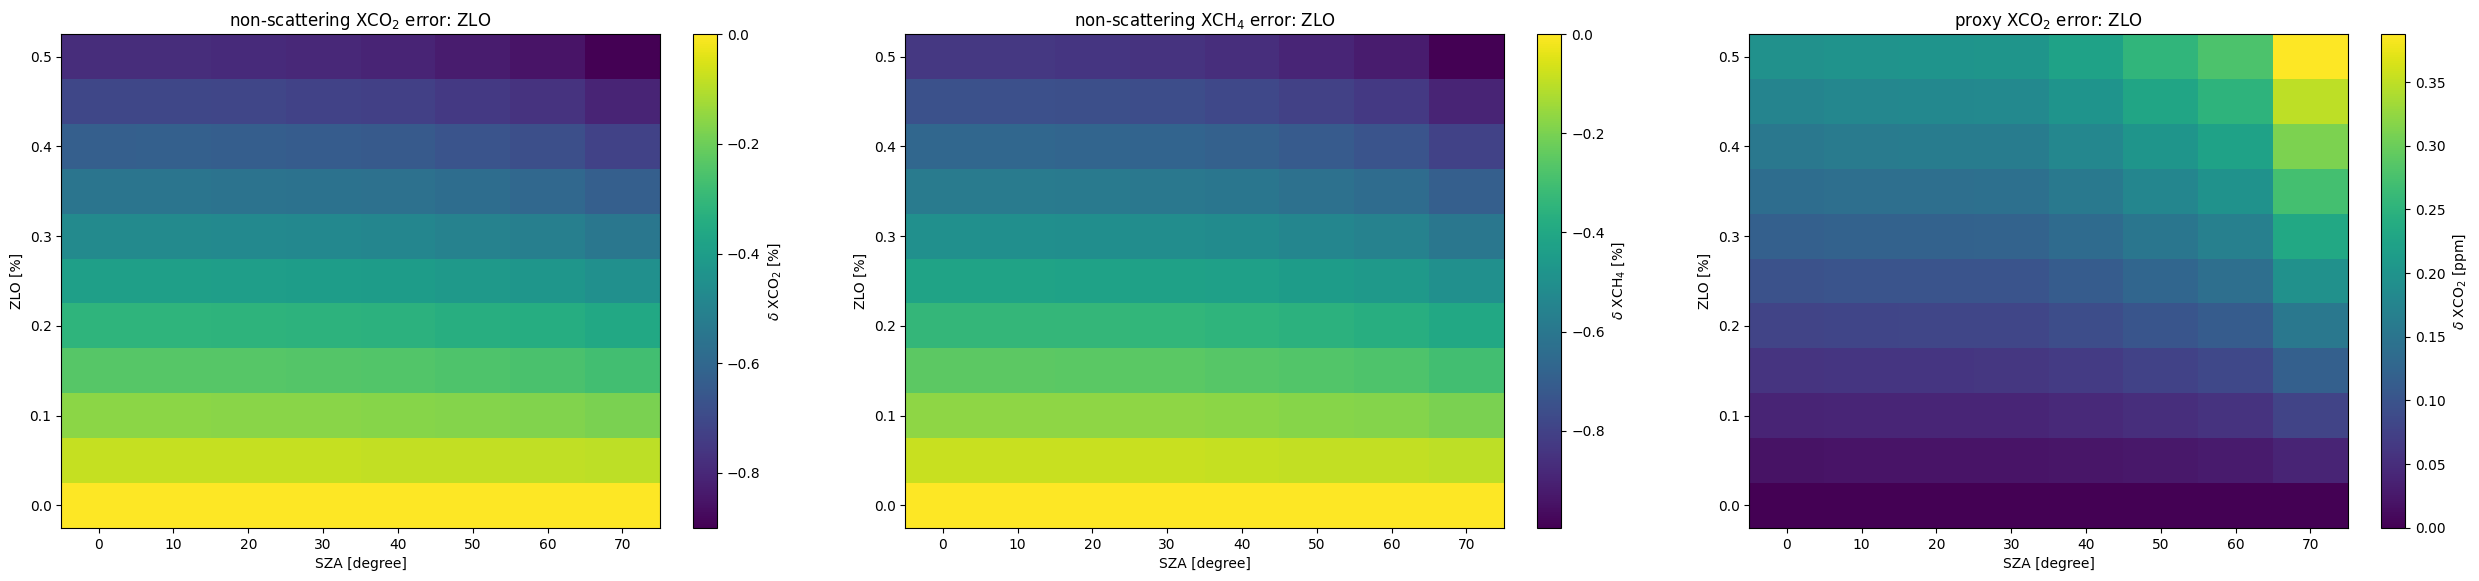

In [ ]:
import netCDF4 as nc
from copy import deepcopy
import matplotlib.pyplot as plt

path_interface = "/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/"

# read data from files
nzlo = 11
nsza = 8
zlo = np.arange(nzlo) * 0.0005
sza = [70.0, 60, 50, 40, 30, 20, 10, 0]
co2 = np.zeros((nzlo, nsza))
ch4 = np.zeros((nzlo, nsza))
co2_ns = np.zeros((nzlo, nsza))
ch4_ns = np.zeros((nzlo, nsza))
for izlo, rad_offset in enumerate(zlo):
    filename = (
        path_interface
        + "level2/Tango_Carbon_l2_exp3.0_rad_offset"
        + "{:.4f}".format(rad_offset)
        + ".nc"
    )
    l2_data = nc.Dataset(filename)
    xco2_proxy = deepcopy(l2_data["XCO2 proxy"][:]).flatten()
    xch4_proxy = deepcopy(l2_data["XCH4 proxy"][:]).flatten()
    xco2_ns = deepcopy(l2_data["non_scattering_retrieval"]["XCO2"][:]).flatten()
    xch4_ns = deepcopy(l2_data["non_scattering_retrieval"]["XCH4"][:]).flatten()
    prec_xco2_proxy = deepcopy(l2_data["precision XCO2 proxy"][:]).flatten()
    prec_xch4_proxy = deepcopy(l2_data["precision XCH4 proxy"][:]).flatten()
    prec_xco2_ns = deepcopy(l2_data["non_scattering_retrieval"]["precision XCO2"][:]).flatten()
    prec_xch4_ns = deepcopy(l2_data["non_scattering_retrieval"]["precision XCH4"][:]).flatten()
    l2_data.close()

    co2[izlo, :] = xco2_proxy[:]
    ch4[izlo, :] = xco2_proxy[:]
    co2_ns[izlo, :] = xco2_ns[:]
    ch4_ns[izlo, :] = xch4_ns[:]

# calculate errors
delta_xco2 = np.zeros((nzlo, nsza))
delta_xco2_ns = np.zeros((nzlo, nsza))
delta_xch4_ns = np.zeros((nzlo, nsza))

for izlo in range(nzlo):
    delta_xco2[izlo, :] = co2[izlo, :] - co2[0, :]
    delta_xco2_ns[izlo, :] = (co2_ns[izlo, :] - co2_ns[0, :]) / co2_ns[0, :] * 100.0
    delta_xch4_ns[izlo, :] = (ch4_ns[izlo, :] - ch4_ns[0, :]) / ch4_ns[0, :] * 100.0

# figures
fig = plt.figure(
    figsize=(26, 7),
    dpi=100,
)
ax1 = fig.add_subplot(131)
mesh1 = ax1.pcolormesh(
    sza, zlo * 100.0, delta_xco2_ns
)  # , vmin=390., vmax=435., cmap = 'BuPu', transform=ccrs.PlateCarree(), alpha = 0.8)
cbar1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", fraction=0.04, pad=0.05)
cbar1.set_label("$\delta$ XCO$_2$ [%]")
ax1.set_title("non-scattering XCO$_2$ error: ZLO")
ax1.set_ylabel("ZLO [%]")
ax1.set_xlabel("SZA [degree]")

ax1 = fig.add_subplot(132)
mesh1 = ax1.pcolormesh(
    sza, zlo * 100.0, delta_xch4_ns
)  # , vmin=390., vmax=435., cmap = 'BuPu', transform=ccrs.PlateCarree(), alpha = 0.8)
cbar1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", fraction=0.04, pad=0.05)
cbar1.set_label("$\delta$ XCH$_4$ [%]")
ax1.set_title("non-scattering XCH$_4$ error: ZLO")
ax1.set_ylabel("ZLO [%]")
ax1.set_xlabel("SZA [degree]")

ax1 = fig.add_subplot(133)
mesh1 = ax1.pcolormesh(
    sza, zlo * 100.0, delta_xco2
)  # , vmin=390., vmax=435., cmap = 'BuPu', transform=ccrs.PlateCarree(), alpha = 0.8)
cbar1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", fraction=0.04, pad=0.05)
cbar1.set_label("$\delta$ XCO$_2$ [ppm]")
ax1.set_title("proxy XCO$_2$ error: ZLO")
ax1.set_ylabel("ZLO [%]")
ax1.set_xlabel("SZA [degree]")

fig.tight_layout(pad=5.0)
plt.savefig(
    "plots/zlo.png",
)

9.2 Test linear error propagation

Text(0.5, 1.0, 'CO$_2$ proxy')

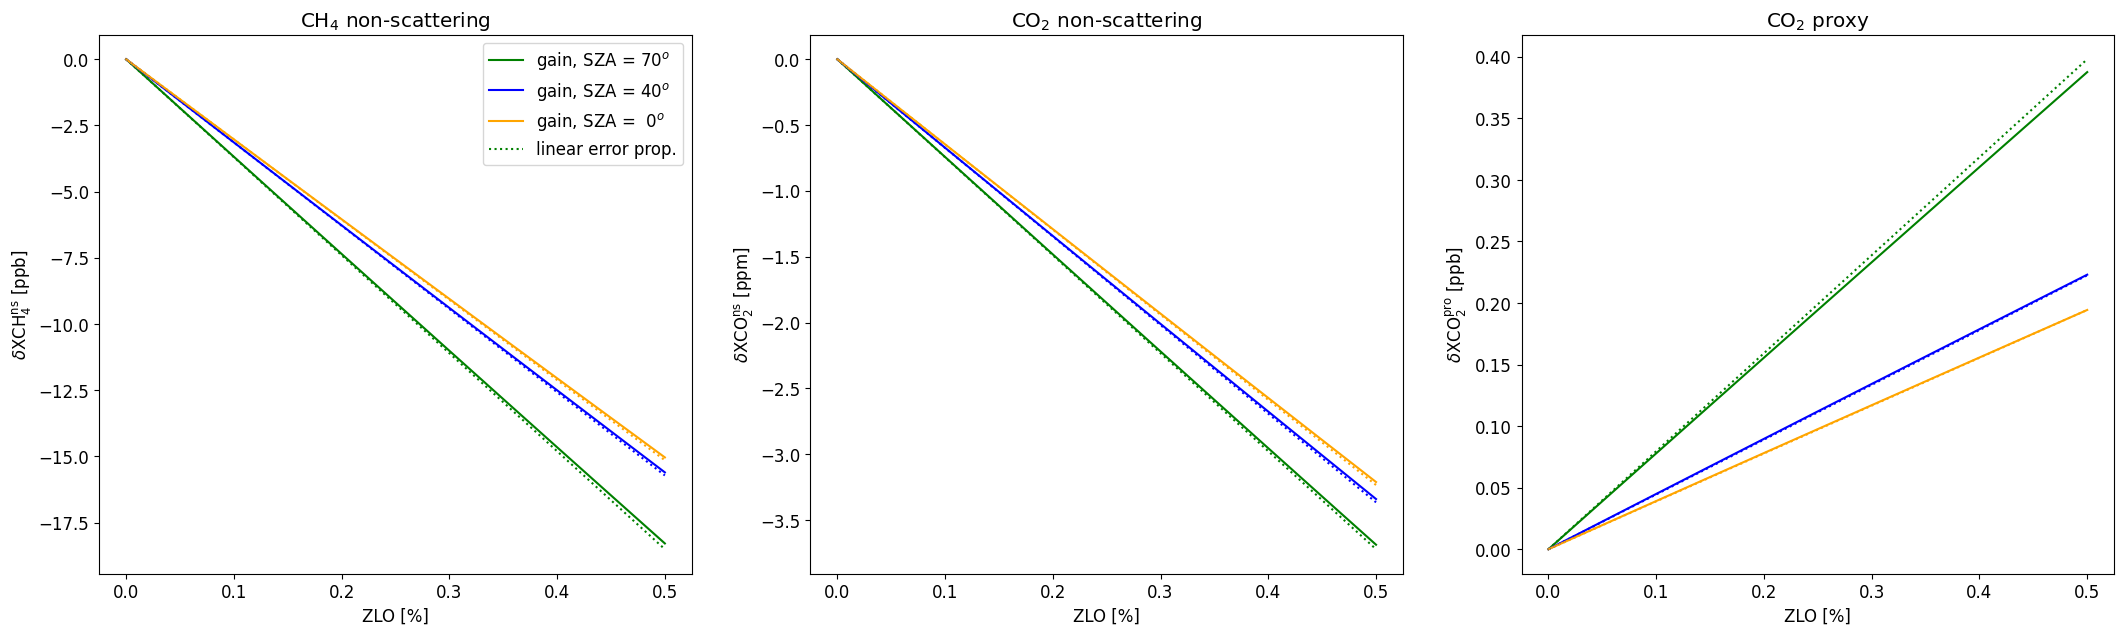

In [ ]:
# read diagnosticts from file
filel2_diag = "/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/level2/Tango_Carbon_l2_diag_exp3.0.nc"
diag = Dataset(filel2_diag, mode="r")
wavelength = diag["wavelength"][:]
radiance = diag["measurement"][:]
gain_ch4_ns = diag["gain CH4"][:]
gain_co2_ns = diag["gain CO2"][:]
# diag.variables.keys()

# calculate proxy gains
nwave = radiance[0, 0, :].size
gain_co2_proxy = np.zeros([1, nsza, nwave])
gain_ch4_proxy = np.zeros([1, nsza, nwave])

for isza in range(nsza):
    gain_co2_proxy[0, isza, :] = (
        gain_co2_ns[0, isza, :] / co2_ns[0, isza] - gain_ch4_ns[0, isza, :] / ch4_ns[0, isza]
    ) * co2[0, isza]
    gain_ch4_proxy[0, isza, :] = (
        gain_ch4_ns[0, isza, :] / ch4_ns[0, isza] - gain_co2_ns[0, isza, :] / co2_ns[0, isza]
    ) * ch4[0, isza]

isza1 = 0  # SZA = 70 degree
isza2 = 3  # SZA = 40 degree
isza3 = 7  # SZA =  0 degree

# calculate errors with respect to reference
delta_XCO2ns = np.zeros([nzlo, nsza])
delta_XCH4ns = np.zeros([nzlo, nsza])
delta_XCO2 = np.zeros([nzlo, nsza])

nwave = radiance[0, 0, :].size
for izlo, rad_offset in enumerate(zlo):
    for isza in range(nsza):
        offset = rad_offset * np.max(radiance[0, isza, :]) + np.zeros(nwave)
        delta_XCO2ns[izlo, isza] = np.dot(gain_co2_ns[0, isza, :], offset)
        delta_XCH4ns[izlo, isza] = np.dot(gain_ch4_ns[0, isza, :], offset)
        delta_XCO2[izlo, isza] = np.dot(gain_co2_proxy[0, isza, :], offset)

# figures
matplotlib.rcParams.update({"font.size": 12})
fig = plt.figure(
    figsize=(26, 7),
    dpi=100,
)
ax1 = fig.add_subplot(131)
scale = 100.0
ax1.plot(
    zlo * scale,
    ch4_ns[:, isza1] - ch4_ns[0, isza1],
    color="green",
    label="gain, SZA = 70$^o$",
)
ax1.plot(
    zlo * scale,
    ch4_ns[:, isza2] - ch4_ns[0, isza2],
    color="blue",
    label="gain, SZA = 40$^o$",
)
ax1.plot(
    zlo * scale,
    ch4_ns[:, isza3] - ch4_ns[0, isza3],
    color="orange",
    label="gain, SZA =  0$^o$",
)

ax1.plot(
    zlo * scale,
    delta_XCH4ns[:, isza1],
    color="green",
    label="linear error prop.",
    linestyle=":",
)
ax1.plot(zlo * scale, delta_XCH4ns[:, isza2], color="blue", linestyle=":")
ax1.plot(zlo * scale, delta_XCH4ns[:, isza3], color="orange", linestyle=":")
ax1.set_ylabel("$\delta$XCH$_4^\mathrm{ns}$ [ppb]")
ax1.set_xlabel("ZLO [%]")
ax1.legend()
ax1.set_title("CH$_4$ non-scattering")

ax2 = fig.add_subplot(132)
ax2.plot(
    zlo * scale,
    co2_ns[:, isza1] - co2_ns[0, isza1],
    color="green",
)
ax2.plot(
    zlo * scale,
    co2_ns[:, isza2] - co2_ns[0, isza2],
    color="blue",
)
ax2.plot(
    zlo * scale,
    co2_ns[:, isza3] - co2_ns[0, isza3],
    color="orange",
)

ax2.plot(zlo * scale, delta_XCO2ns[:, isza1], color="green", linestyle=":")
ax2.plot(zlo * scale, delta_XCO2ns[:, isza2], color="blue", linestyle=":")
ax2.plot(zlo * scale, delta_XCO2ns[:, isza3], color="orange", linestyle=":")
ax2.set_ylabel("$\delta$XCO$_2^\mathrm{ns}$ [ppm]")
ax2.set_xlabel("ZLO [%]")
ax2.set_title("CO$_2$ non-scattering")

ax3 = fig.add_subplot(133)
ax3.plot(
    zlo * scale,
    co2[:, isza1] - co2[0, isza1],
    color="green",
)
ax3.plot(
    zlo * scale,
    co2[:, isza2] - co2[0, isza2],
    color="blue",
)
ax3.plot(
    zlo * scale,
    co2[:, isza3] - co2[0, isza3],
    color="orange",
)

ax3.plot(zlo * scale, delta_XCO2[:, isza1], color="green", linestyle=":")
ax3.plot(zlo * scale, delta_XCO2[:, isza2], color="blue", linestyle=":")
ax3.plot(zlo * scale, delta_XCO2[:, isza3], color="orange", linestyle=":")

ax3.set_ylabel("$\delta$XCO$_2^\mathrm{pro}$ [ppb]")
ax3.set_xlabel("ZLO [%]")
ax3.set_title("CO$_2$ proxy")
plt.savefig(
    "plots/linear_versus_non_linear.png",
)